In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading the dataset and creating a pd dataframe
hdf = pd.read_csv('features.csv')

In [2]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            2214 non-null   float64
 1   Y                                               2214 non-null   float64
 2   Number of floors                                2213 non-null   float64
 3   Number of windows                               2213 non-null   float64
 4   Number of balconies                             2214 non-null   float64
 5   Number of entrances                             2214 non-null   float64
 6   Number of colors used                           2214 non-null   float64
 7   Color type                                      2213 non-null   float64
 8   Distance between windows (minimum)              2214 non-null   float64
 9   Distance between windows (maximum)       

In [3]:
# eliminating the empty rows of dataframe
hdf_clean = hdf.drop(hdf.index[2214:])

# eliminating non-feature/output columns
hdf_clean = hdf.drop(hdf_clean.columns[32:], axis = 1)


# eliminating duplicate data
for i, v in hdf_clean.duplicated().iteritems():
    if v == True:
        hdf_clean = hdf_clean.drop(i)

<ipython-input-3-ab16a8324128>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in hdf_clean.duplicated().iteritems():


In [4]:
# size of dataset
hdf_clean.shape

(2207, 32)

In [5]:
print('Check the nan value in data')
print(hdf_clean.isnull().sum())

Check the nan value in data
Year                                              1
Y                                                 1
Number of floors                                  2
Number of windows                                 2
Number of balconies                               1
Number of entrances                               1
Number of colors used                             1
Color type                                        2
Distance between windows (minimum)                1
Distance between windows (maximum)                2
Number of materials used                          2
Type of materials                                 1
Line type (curved and smooth)                     2
Roof line (continuous or discontinuous)           1
Form of windows                                   1
Entrance form                                     3
Protrusion or indentation of the floor surface    1
Ground floor bulge or indentation                 1
Protrusion or indentation of windows

array([[<Axes: title={'center': 'Year'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'Number of floors'}>,
        <Axes: title={'center': 'Number of windows'}>,
        <Axes: title={'center': 'Number of balconies'}>,
        <Axes: title={'center': 'Number of entrances'}>],
       [<Axes: title={'center': 'Number of colors used'}>,
        <Axes: title={'center': 'Color type'}>,
        <Axes: title={'center': 'Distance between windows (minimum)'}>,
        <Axes: title={'center': 'Distance between windows (maximum)'}>,
        <Axes: title={'center': 'Number of materials used'}>,
        <Axes: title={'center': 'Type of materials'}>],
       [<Axes: title={'center': 'Line type (curved and smooth)'}>,
        <Axes: title={'center': 'Roof line (continuous or discontinuous)'}>,
        <Axes: title={'center': 'Form of windows'}>,
        <Axes: title={'center': 'Entrance form'}>,
        <Axes: title={'center': 'Protrusion or indentation of the floor surface'}>,
  

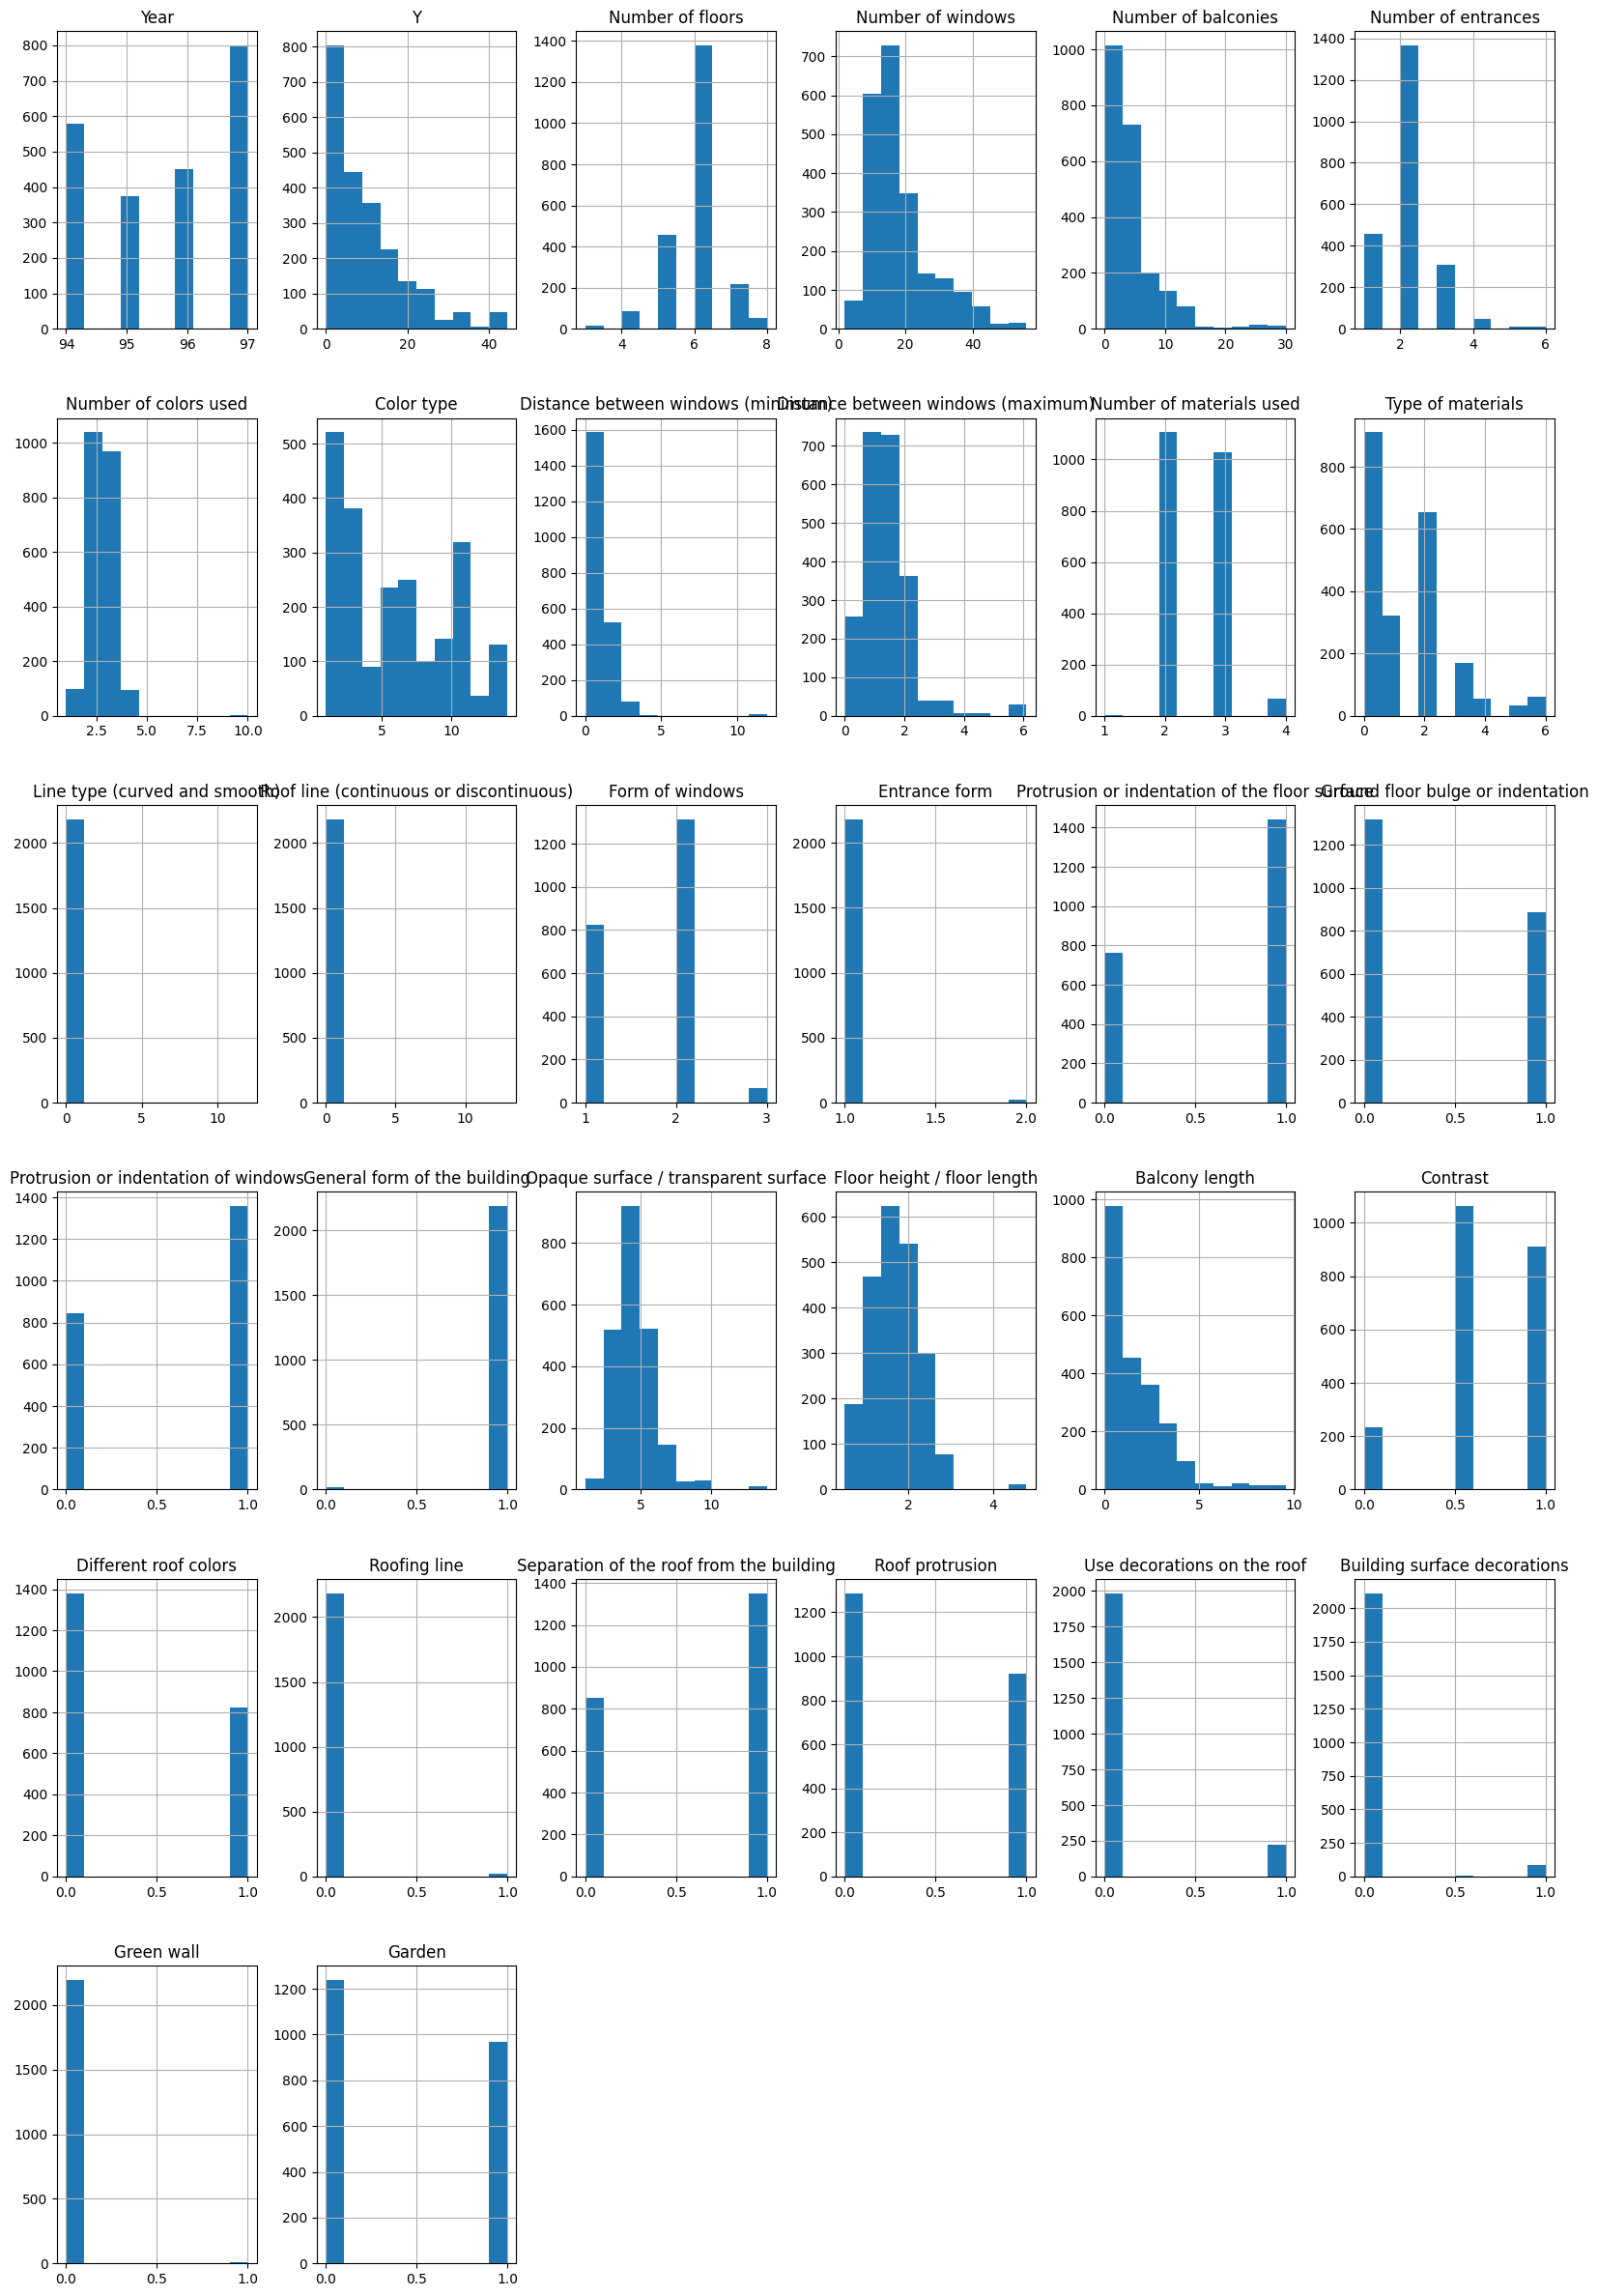

In [6]:
# histogram
hdf_clean.hist(figsize=(20,30))

In [7]:
#filling in the missing values
for i in range (32):
    hdf_clean.iloc[:, i] =  hdf_clean.iloc[:, i].fillna(hdf_clean.iloc[:, i].mean())

In [8]:
hdf_clean.isnull().sum()

Year                                              0
Y                                                 0
Number of floors                                  0
Number of windows                                 0
Number of balconies                               0
Number of entrances                               0
Number of colors used                             0
Color type                                        0
Distance between windows (minimum)                0
Distance between windows (maximum)                0
Number of materials used                          0
Type of materials                                 0
Line type (curved and smooth)                     0
Roof line (continuous or discontinuous)           0
Form of windows                                   0
Entrance form                                     0
Protrusion or indentation of the floor surface    0
Ground floor bulge or indentation                 0
Protrusion or indentation of windows              0
General form

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(1, 0, 'Year'),
  Text(2, 0, 'Y'),
  Text(3, 0, 'Number of floors'),
  Text(4, 0, 'Number of windows'),
  Text(5, 0, 'Number of balconies'),
  Text(6, 0, 'Number of entrances'),
  Text(7, 0, 'Number of colors used'),
  Text(8, 0, 'Color type'),
  Text(9, 0, 'Distance between windows (minimum)'),
  Text(10, 0, 'Distance between windows (maximum)'),
  Text(11, 0, 'Number of materials used'),
  Text(12, 0, 'Type of materials'),
  Text(13, 0, 'Line type (curved and smooth)'),
  Text(14, 0, 'Roof line (continuous or discontinuous)'),
  Text(15, 0, 'Form of windows'),
  Text(16, 0, 'Entrance form'),
  Text(17, 0, 'Protrusion or indentation of the floor surface'),
  Text(18, 0, 'Ground floor bulge or indentation'),
  Text(19, 0, 'Protrusion or indentation of windows'),
  Text(20, 0, 'General form of the building'),
  Text(21, 0, 'Opaque surfac

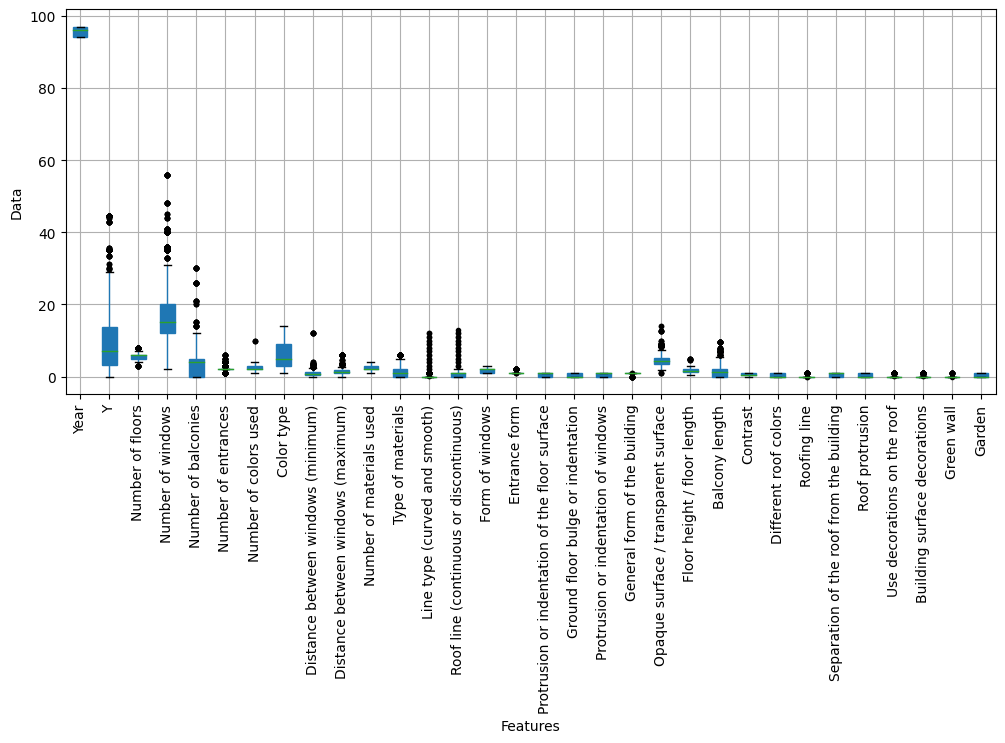

In [9]:
# plotting the boxplot of dataset
plt.subplots(figsize=(12,5))
hdf_clean.boxplot(patch_artist=True, sym="k.")
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=90)

In [10]:
# function for detecting outliers by quartile method

minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature,25)
    third_q = np.percentile(feature,75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR
    maximum = third_q + IQR
    flag = False
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True

    if flag == True:
       return "It has outliers. values sould be between {} to {} but min value is {} and max value is {}".format(minimum,maximum,np.min(feature),np.max(feature))
    if flag == False:
       return "This feature deosn't have any outliers"

In [11]:
# detecting the outliers
for i in range(len(hdf_clean.columns)):
       print(hdf_clean.columns[i] +" : "+ detect_outlier(hdf_clean[hdf_clean.columns[i]]) + "\n")

Year : This feature deosn't have any outliers

Y : It has outliers. values sould be between -12.299999999999997 to 29.299999999999997 but min value is 0.0 and max value is 44.5

Number of floors : It has outliers. values sould be between 3.5 to 7.5 but min value is 3.0 and max value is 8.0

Number of windows : It has outliers. values sould be between 0.0 to 32.0 but min value is 2.0 and max value is 56.0

Number of balconies : It has outliers. values sould be between -7.5 to 12.5 but min value is 0.0 and max value is 30.0

Number of entrances : It has outliers. values sould be between 2.0 to 2.0 but min value is 1.0 and max value is 6.0

Number of colors used : It has outliers. values sould be between 0.5 to 4.5 but min value is 1.0 and max value is 10.0

Color type : This feature deosn't have any outliers

Distance between windows (minimum) : It has outliers. values sould be between -0.7000000000000002 to 2.5 but min value is 0.0 and max value is 11.96

Distance between windows (maxim

In [12]:
# showing the numbers of outliers in each feature
minimum = 0
maximum = 0

for i in range(len(hdf_clean.columns)):
    first_q = np.percentile(hdf_clean[hdf_clean.columns[i]],25)
    third_q = np.percentile(hdf_clean[hdf_clean.columns[i]],75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR
    maximum = third_q + IQR

    print("{} has {} outliers".format(hdf_clean.columns[i],str((hdf_clean[hdf_clean.columns[i]] < minimum).sum() + (hdf_clean[hdf_clean.columns[i]] > maximum).sum())))

Year has 0 outliers
Y has 110 outliers
Number of floors has 69 outliers
Number of windows has 193 outliers
Number of balconies has 61 outliers
Number of entrances has 841 outliers
Number of colors used has 4 outliers
Color type has 0 outliers
Distance between windows (minimum) has 53 outliers
Distance between windows (maximum) has 82 outliers
Number of materials used has 0 outliers
Type of materials has 60 outliers
Line type (curved and smooth) has 105 outliers
Roof line (continuous or discontinuous) has 21 outliers
Form of windows has 0 outliers
Entrance form has 27 outliers
Protrusion or indentation of the floor surface has 0 outliers
Ground floor bulge or indentation has 0 outliers
Protrusion or indentation of windows has 0 outliers
General form of the building has 18 outliers
Opaque surface / transparent surface has 69 outliers
Floor height / floor length has 12 outliers
Balcony length has 66 outliers
Contrast has 0 outliers
Different roof colors has 0 outliers
Roofing line has 22 

In [13]:
# function for removing outliers.

def remove_outlier(feature):
    first_q = np.percentile(hdf_clean[feature], 25)
    third_q = np.percentile(hdf_clean[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5

    minimum = first_q - IQR
    maximum = third_q + IQR

    median = hdf_clean[feature].mean()
    """
    any value beyond the acceptance range are considered as outliers.
    we replace the outliers with the median value of that feature.

    """
    hdf_clean.loc[hdf_clean[feature] < minimum, feature] = median
    hdf_clean.loc[hdf_clean[feature] > maximum, feature] = median

In [14]:
# removing outliers
for i in range(50):
    for i in range(len(hdf_clean.columns)):
        remove_outlier(hdf_clean.columns[i])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(1, 0, 'Year'),
  Text(2, 0, 'Y'),
  Text(3, 0, 'Number of floors'),
  Text(4, 0, 'Number of windows'),
  Text(5, 0, 'Number of balconies'),
  Text(6, 0, 'Number of entrances'),
  Text(7, 0, 'Number of colors used'),
  Text(8, 0, 'Color type'),
  Text(9, 0, 'Distance between windows (minimum)'),
  Text(10, 0, 'Distance between windows (maximum)'),
  Text(11, 0, 'Number of materials used'),
  Text(12, 0, 'Type of materials'),
  Text(13, 0, 'Line type (curved and smooth)'),
  Text(14, 0, 'Roof line (continuous or discontinuous)'),
  Text(15, 0, 'Form of windows'),
  Text(16, 0, 'Entrance form'),
  Text(17, 0, 'Protrusion or indentation of the floor surface'),
  Text(18, 0, 'Ground floor bulge or indentation'),
  Text(19, 0, 'Protrusion or indentation of windows'),
  Text(20, 0, 'General form of the building'),
  Text(21, 0, 'Opaque surfac

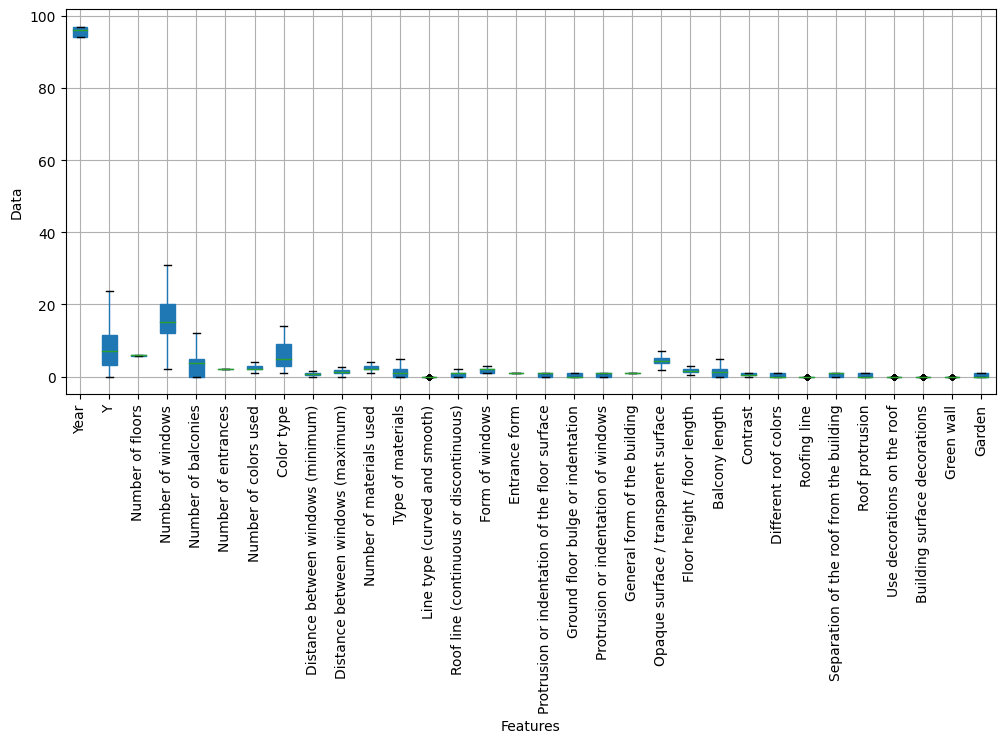

In [15]:
# plotting the data after solving the outliers problem
plt.subplots(figsize=(12,5))
hdf_clean.boxplot(patch_artist = True, sym="k.")
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=90)

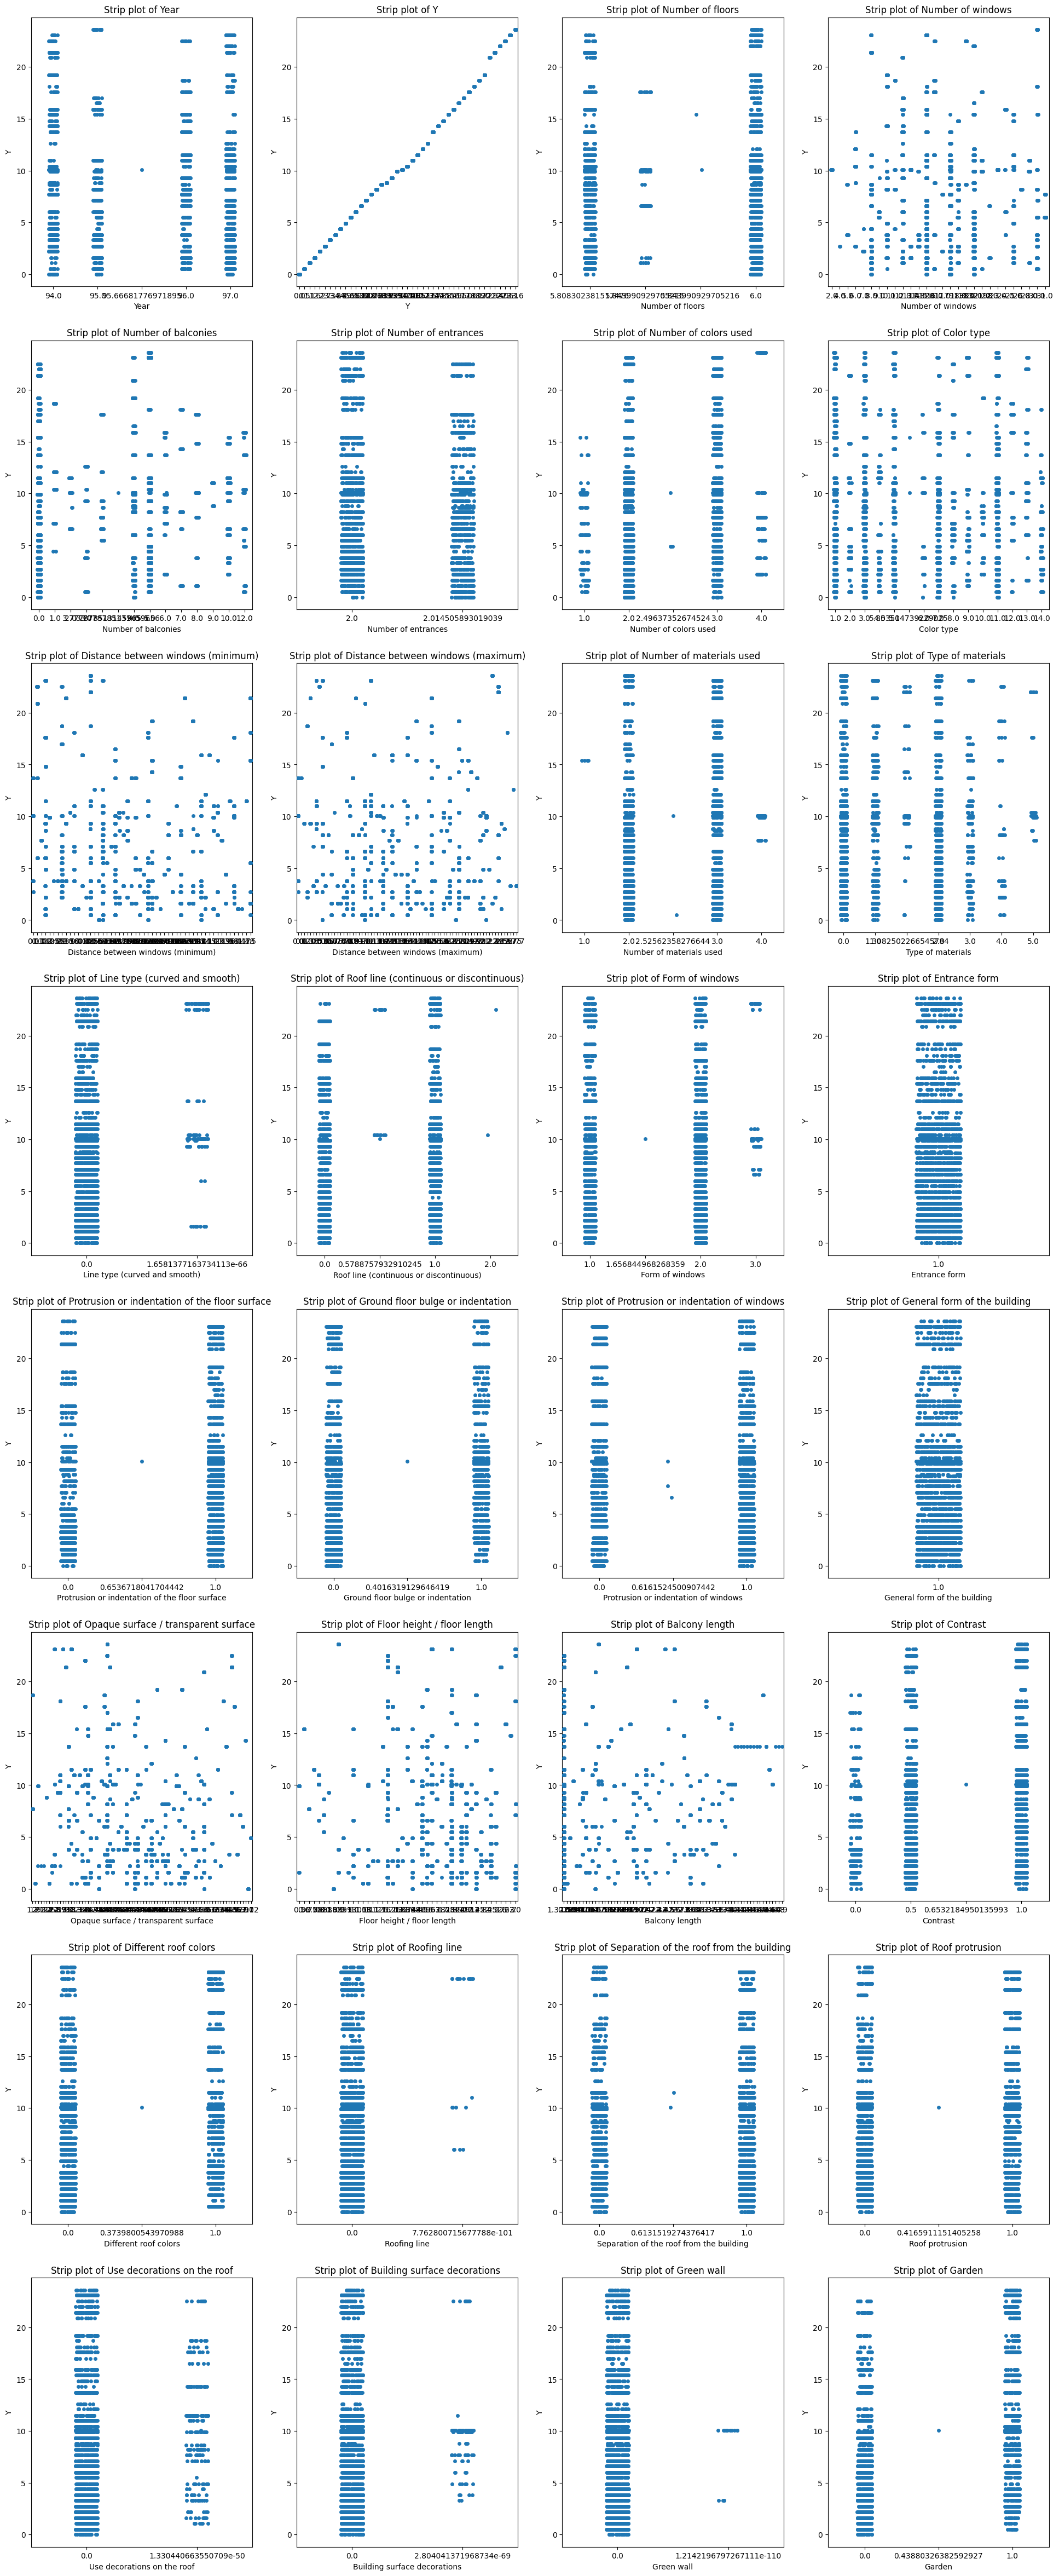

In [16]:
# visualizing the distribution/scatter plot of each feature values
plt.figure(figsize = (24, 60))
col_count = 1
for col in hdf_clean:
    plt.subplot(8, 4, col_count)
    sns.stripplot(data = hdf_clean, x = col, y = hdf_clean["Y"])
    plt.title(f'Strip plot of {col}')
    col_count += 1

In [ ]:
# deselection of features with little information
hdf_clean = (hdf_clean.drop(['Entrance form', 'General form of the building', 'Roofing line', 'Green wall'], axis=1))

Text(0.5, 1.0, 'Heatmap of correlation between features')

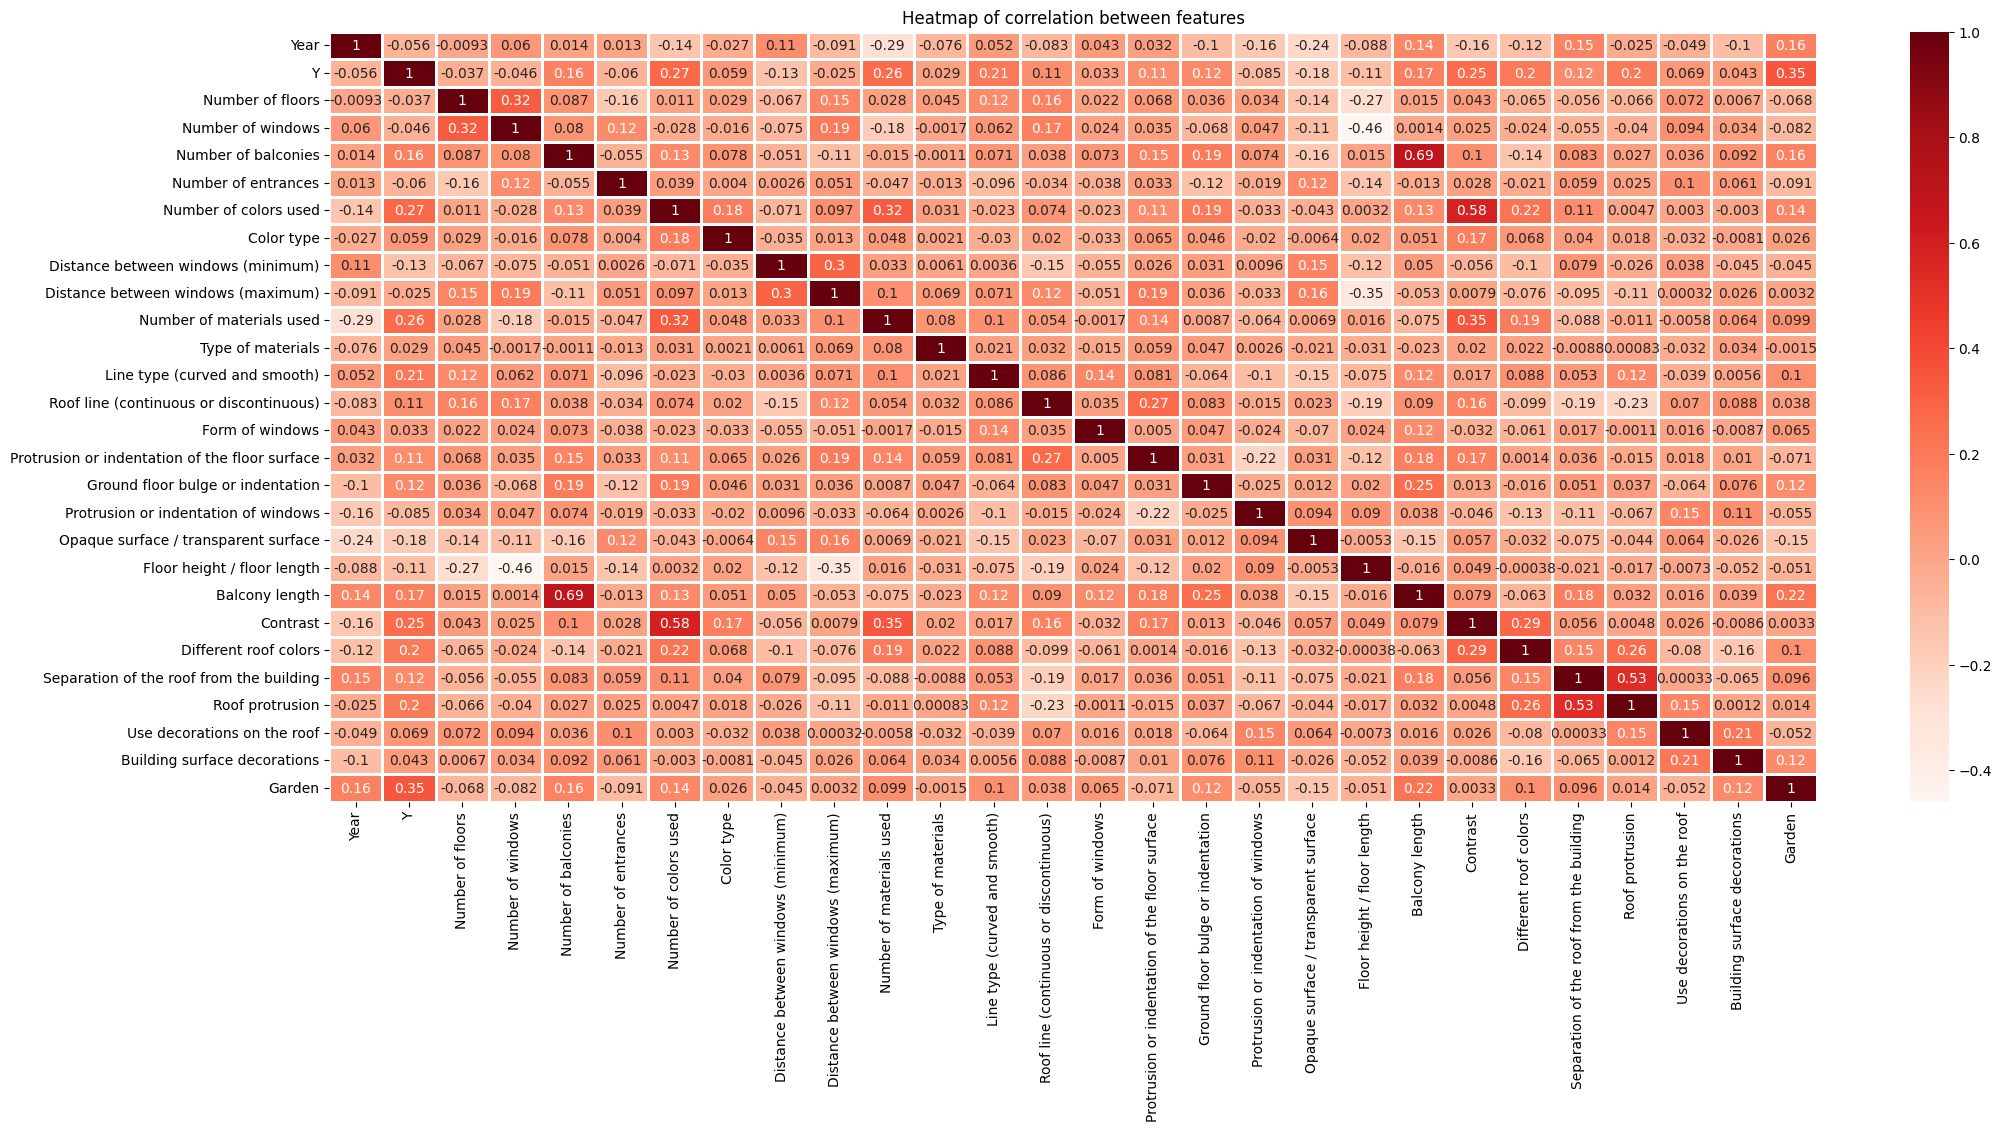

In [19]:
# Heatmap of correlation matrix between features
fig, ax = plt.subplots(figsize = (24, 10))
cor = hdf_clean.corr()
sns.heatmap(cor , linewidths = 1, cmap = plt.cm.Reds, ax = ax, annot = True, cbar=True)
plt.title('Heatmap of correlation between features')

In [20]:
#Correlation with output variable
cor_target = abs(cor["Y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

Y         1.000000
Garden    0.349439
Name: Y, dtype: float64

In [21]:
hdf_clean = (hdf_clean.drop(["Garden"] , axis=1))

In [22]:
hdf_clean.columns

Index(['Year', 'Y', 'Number of floors', 'Number of windows',
       'Number of balconies', 'Number of entrances', 'Number of colors used',
       'Color type', 'Distance between windows (minimum)',
       'Distance between windows (maximum)', 'Number of materials used',
       'Type of materials', 'Line type (curved and smooth)',
       'Roof line (continuous or discontinuous)', 'Form of windows',
       'Protrusion or indentation of the floor surface',
       'Ground floor bulge or indentation',
       'Protrusion or indentation of windows',
       'Opaque surface / transparent surface', 'Floor height / floor length',
       'Balcony length', 'Contrast', 'Different roof colors',
       'Separation of the roof from the building', 'Roof protrusion',
       'Use decorations on the roof', 'Building surface decorations'],
      dtype='object')

In [23]:
# class labels bining
hdf_clean["Y"] = pd.qcut(hdf_clean["Y"], 4, retbins = False, labels = [1, 2, 3, 4])

# eliminating the output column
hdf_Ultraclean = hdf_clean.drop("Y", axis = 1)

In [24]:
hdf_clean

,Year,Y,Number of floors,Number of windows,Number of balconies,Number of entrances,Number of colors used,Color type,Distance between windows (minimum),Distance between windows (maximum),...,Protrusion or indentation of windows,Opaque surface / transparent surface,Floor height / floor length,Balcony length,Contrast,Different roof colors,Separation of the roof from the building,Roof protrusion,Use decorations on the roof,Building surface decorations
0,94.000000,4,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
1,94.000000,4,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
2,94.000000,4,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
3,94.000000,4,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
4,94.000000,4,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,97.000000,3,5.808302,17.828118,0.000000,2.014506,3.000000,11.000000,1.400000,1.400000,...,1.000000,3.200000,0.80000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
2211,97.000000,3,5.808302,17.828118,0.000000,2.014506,3.000000,11.000000,1.400000,1.400000,...,1.000000,3.200000,0.80000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
2212,97.000000,3,5.808302,17.828118,0.000000,2.014506,3.000000,11.000000,1.400000,1.400000,...,1.000000,3.200000,0.80000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
2213,97.000000,3,5.808302,17.828118,0.000000,2.014506,3.000000,11.000000,1.400000,1.400000,...,1.000000,3.200000,0.80000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00


In [26]:
hdf_Ultraclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2207 entries, 0 to 2214
Data columns (total 26 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            2207 non-null   float64
 1   Number of floors                                2207 non-null   float64
 2   Number of windows                               2207 non-null   float64
 3   Number of balconies                             2207 non-null   float64
 4   Number of entrances                             2207 non-null   float64
 5   Number of colors used                           2207 non-null   float64
 6   Color type                                      2207 non-null   float64
 7   Distance between windows (minimum)              2207 non-null   float64
 8   Distance between windows (maximum)              2207 non-null   float64
 9   Number of materials used                 

In [27]:
hdf_Ultraclean

,Year,Number of floors,Number of windows,Number of balconies,Number of entrances,Number of colors used,Color type,Distance between windows (minimum),Distance between windows (maximum),Number of materials used,...,Protrusion or indentation of windows,Opaque surface / transparent surface,Floor height / floor length,Balcony length,Contrast,Different roof colors,Separation of the roof from the building,Roof protrusion,Use decorations on the roof,Building surface decorations
0,94.000000,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,3.000000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
1,94.000000,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,3.000000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
2,94.000000,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,3.000000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
3,94.000000,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,3.000000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
4,94.000000,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,3.000000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,97.000000,5.808302,17.828118,0.000000,2.014506,3.000000,11.000000,1.400000,1.400000,2.000000,...,1.000000,3.200000,0.80000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
2211,97.000000,5.808302,17.828118,0.000000,2.014506,3.000000,11.000000,1.400000,1.400000,2.000000,...,1.000000,3.200000,0.80000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
2212,97.000000,5.808302,17.828118,0.000000,2.014506,3.000000,11.000000,1.400000,1.400000,2.000000,...,1.000000,3.200000,0.80000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
2213,97.000000,5.808302,17.828118,0.000000,2.014506,3.000000,11.000000,1.400000,1.400000,2.000000,...,1.000000,3.200000,0.80000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00


In [28]:
# split data
X = hdf_Ultraclean.iloc[:,0:26]
Y = hdf_clean.iloc[:,1]

In [29]:
X

,Year,Number of floors,Number of windows,Number of balconies,Number of entrances,Number of colors used,Color type,Distance between windows (minimum),Distance between windows (maximum),Number of materials used,...,Protrusion or indentation of windows,Opaque surface / transparent surface,Floor height / floor length,Balcony length,Contrast,Different roof colors,Separation of the roof from the building,Roof protrusion,Use decorations on the roof,Building surface decorations
0,94.000000,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,3.000000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
1,94.000000,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,3.000000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
2,94.000000,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,3.000000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
3,94.000000,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,3.000000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
4,94.000000,6.000000,15.000000,0.000000,2.000000,3.000000,3.000000,0.815429,1.900000,3.000000,...,0.000000,4.000000,1.30000,0.000000,0.500000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,97.000000,5.808302,17.828118,0.000000,2.014506,3.000000,11.000000,1.400000,1.400000,2.000000,...,1.000000,3.200000,0.80000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
2211,97.000000,5.808302,17.828118,0.000000,2.014506,3.000000,11.000000,1.400000,1.400000,2.000000,...,1.000000,3.200000,0.80000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
2212,97.000000,5.808302,17.828118,0.000000,2.014506,3.000000,11.000000,1.400000,1.400000,2.000000,...,1.000000,3.200000,0.80000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00
2213,97.000000,5.808302,17.828118,0.000000,2.014506,3.000000,11.000000,1.400000,1.400000,2.000000,...,1.000000,3.200000,0.80000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00


In [30]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [31]:
#Applying PCA
from sklearn.decomposition import PCA
#Taking no. of Principal Components as 10
pca = PCA(n_components = 10)
pca.fit(X)
X = pca.transform(X)
X = pd.DataFrame(X,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.084504,1.192632,-1.187553,1.893291,0.016949,0.204965,1.612912,-1.826810,0.497147,-0.423688
1,-0.158321,1.138866,-0.878869,1.776225,-0.237085,0.221016,1.931701,-1.324898,0.224285,-1.284444
2,-0.148206,1.171055,-1.247787,1.900872,0.001181,0.177132,1.830423,-1.865694,0.863201,-0.055126
3,-0.222023,1.117289,-0.939103,1.783806,-0.252853,0.193183,2.149211,-1.363781,0.590339,-0.915882
4,-0.211908,1.149478,-1.308021,1.908453,-0.014587,0.149299,2.047933,-1.904577,1.229255,0.313436


In [41]:
# set aside 20% of train and test data for evaluation
from sklearn.model_selection import train_test_split
X_learn, X_test, Y_learn, Y_test = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state = 42)


print("X_learn shape: {}".format(X_learn.shape))
print("X_test shape: {}".format(X_test.shape))
print("Y_learn shape: {}".format(Y_learn.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_learn shape: (1765, 10)
X_test shape: (442, 10)
Y_learn shape: (1765,)
Y_test shape: (442,)


<Axes: >

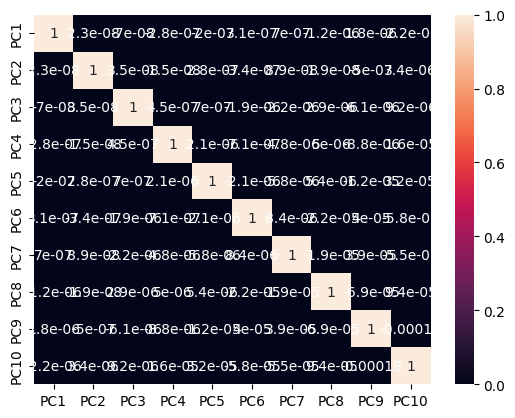

In [33]:
#Checking Co-relation between features after PCA
sns.heatmap(X.corr(method='pearson'), annot=True)

In [34]:
# find best k for KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
krange = range(2, 20)
accuracy = []
for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_learn, Y_learn)

    Y_pred = knn.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    accuracy.append(acc)

for i in range(len(krange)):
    print('For k = %i Accuracy is %f' %(krange[i], accuracy[i]))

best_k = krange[accuracy.index(max(accuracy))]
print("Best K:", best_k)

For k = 2 Accuracy is 0.966063
For k = 3 Accuracy is 0.952489
For k = 4 Accuracy is 0.945701
For k = 5 Accuracy is 0.943439
For k = 6 Accuracy is 0.927602
For k = 7 Accuracy is 0.923077
For k = 8 Accuracy is 0.900452
For k = 9 Accuracy is 0.898190
For k = 10 Accuracy is 0.877828
For k = 11 Accuracy is 0.837104
For k = 12 Accuracy is 0.800905
For k = 13 Accuracy is 0.805430
For k = 14 Accuracy is 0.787330
For k = 15 Accuracy is 0.771493
For k = 16 Accuracy is 0.748869
For k = 17 Accuracy is 0.753394
For k = 18 Accuracy is 0.746606
For k = 19 Accuracy is 0.719457
Best K: 2


In [42]:
# K-Fold cross validation
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k, random_state=None)

accuracy of each fold - [0.9490084985835694, 0.9405099150141643, 0.9688385269121813, 0.9376770538243626, 0.9376770538243626]
Avg accuracy : 0.9467422096317281
              precision    recall  f1-score   support

           1       0.86      0.99      0.92       112
           2       0.95      0.91      0.93        91
           3       0.98      0.93      0.95       127
           4       1.00      0.94      0.97       112

    accuracy                           0.94       442
   macro avg       0.95      0.94      0.94       442
weighted avg       0.95      0.94      0.94       442



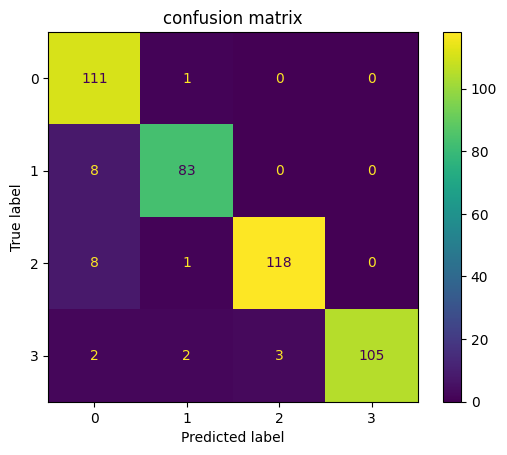

In [43]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2 , metric = 'minkowski')
acc_score1 = []

for train_index , val_index in kf.split(X_learn):
    X_train , X_val = X_learn.iloc[train_index,:], X_learn.iloc[val_index,:]
    Y_train , Y_val = Y_learn.iloc[train_index] , Y_learn.iloc[val_index]

    knn.fit(X_train, Y_train)
    Y_pred1_val = knn.predict(X_val)
    acc = accuracy_score(Y_val , Y_pred1_val)
    acc_score1.append(acc)

avg_acc_score1 = sum(acc_score1)/k

print('accuracy of each fold - {}'.format(acc_score1))
print('Avg accuracy : {}'.format(avg_acc_score1))

Y_pred1_test = knn.predict(X_test)

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred1_test))
display.plot()
plt.title(f'confusion matrix')

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred1_test))

accuracy of each fold - [0.9461756373937678, 0.9490084985835694, 0.9943342776203966, 0.9376770538243626, 0.9546742209631728]
Avg accuracy : 0.9563739376770538
              precision    recall  f1-score   support

           1       0.92      0.99      0.95       112
           2       0.99      0.93      0.96        91
           3       0.98      0.98      0.98       127
           4       1.00      0.96      0.98       112

    accuracy                           0.97       442
   macro avg       0.97      0.97      0.97       442
weighted avg       0.97      0.97      0.97       442



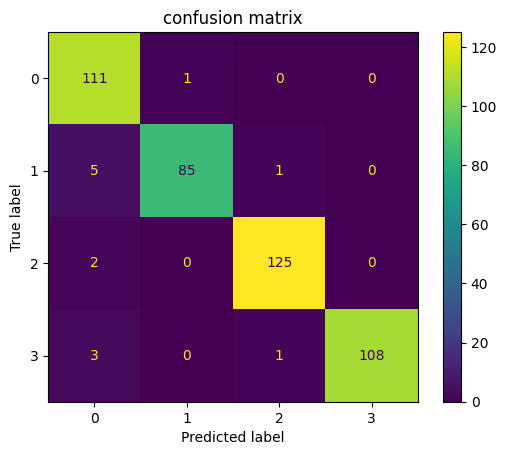

In [44]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)
acc_score2 = []

for train_index , val_index in kf.split(X_learn):
    X_train , X_val = X_learn.iloc[train_index,:], X_learn.iloc[val_index,:]
    Y_train , Y_val = Y_learn.iloc[train_index] , Y_learn.iloc[val_index]

    RF.fit(X_train, Y_train)
    Y_pred2_val = RF.predict(X_val)
    acc = accuracy_score(Y_val , Y_pred2_val)
    acc_score2.append(acc)

avg_acc_score2 = sum(acc_score2)/k

print('accuracy of each fold - {}'.format(acc_score2))
print('Avg accuracy : {}'.format(avg_acc_score2))
Y_pred2_test = RF.predict(X_test)

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred2_test))
display.plot()
plt.title(f'confusion matrix')

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred2_test))

accuracy of each fold - [0.8076923076923077, 0.8122171945701357, 0.830316742081448, 0.8144796380090498, 0.8031674208144797]
Avg accuracy : 0.8135746606334842
              precision    recall  f1-score   support

           1       0.73      0.88      0.79       112
           2       0.70      0.69      0.70        91
           3       0.85      0.87      0.86       127
           4       0.95      0.74      0.83       112

    accuracy                           0.80       442
   macro avg       0.81      0.80      0.80       442
weighted avg       0.82      0.80      0.80       442



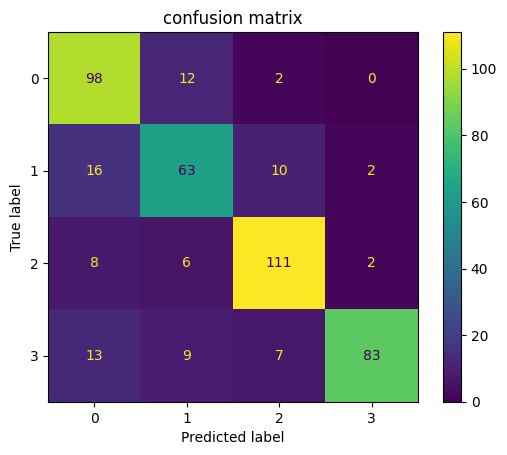

In [45]:
# SVM Classification
from sklearn.svm import SVC
SVM = SVC(kernel='rbf')

acc_score3 = []

for train_index , val_index in kf.split(X_learn):
    X_train , X_val = X_learn.iloc[train_index,:], X_learn.iloc[val_index,:]
    Y_train , Y_val = Y_learn.iloc[train_index] , Y_learn.iloc[val_index]

    SVM.fit(X_train ,Y_train)
    Y_pred3 = SVM.predict(X_test)

    acc = accuracy_score(Y_test , Y_pred3)
    acc_score3.append(acc)

avg_acc_score3 = sum(acc_score3)/k

print('accuracy of each fold - {}'.format(acc_score3))
print('Avg accuracy : {}'.format(avg_acc_score3))
Y_pred3_test = SVM.predict(X_test)

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred3_test))
display.plot()
plt.title(f'confusion matrix')

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred3_test))